## Synthoseis Quick Start Notebook

Synthoseis is an open source, Python-based tool used for generating pseudo-random seismic data. The goal of Synthoseis is to generate realistic seismic data for deep learning training. This notebook will serve as a guide to getting your first Synthoseis model up and running. Future notebooks will discuss seismic outputs, visualizations, and building a custom rock properties model.

### Environment Build

To install the necessary packages, use the `environment.yml` file to create a virtual or conda environment. Please note that the most recent version of Synthoseis has been refactored to work with Python 3.10.

### Imports

Within the main directory of the repo is a script called `main.py`. This is the primary script to run the program. Import `main.py`, along with visualization tools to view the results.

In [1]:
import os
import sys

# Add the parent directory to the system path
sys.path.append("../")

In [2]:
import main as mn 
import numpy as np
import json
import pprint as pp
import h5py as hdf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.widgets import Slider

/home/spaceswimmer/miniconda3/envs/synthoseis/lib/python3.12/site-packages/bruges/__init__.py:20: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import get_distribution, DistributionNotFound


In [3]:
%matplotlib inline

### Building your first model

The config json file is the method for defining some of the key aspects of your seismic survey including survey size, seismic bandwith, column height range, number of faults, sand thickness ranges, and the presence of geobodies like salt and channels. Please note that setting `include_channels: True` will signifcantly increase compute time and memory consumption. Below is an example config file that can be found in `./config/example.json`.

In [4]:
rock_model = json.load(open('../../config/test1.json', 'r'))
pp.pprint(rock_model)

{'bandwidth_high': [20.0, 35.0],
 'bandwidth_low': [3.0, 6.0],
 'bandwidth_ord': 4,
 'basin_floor_fans': False,
 'broadband_qc_volume': False,
 'closure_types': ['simple', 'faulted', 'onlap'],
 'cube_shape': [300, 300, 1250],
 'digi': 4,
 'dip_factor_max': 2,
 'extra_qc_plots': True,
 'incident_angles': [7, 15, 24],
 'include_channels': False,
 'include_salt': True,
 'infill_factor': 10,
 'initial_layer_stdev': [7.0, 25.0],
 'max_column_height': [150.0, 150.0],
 'max_number_faults': 6,
 'min_closure_voxels_faulted': 2500,
 'min_closure_voxels_onlap': 500,
 'min_closure_voxels_simple': 500,
 'min_number_faults': 1,
 'model_qc_volumes': True,
 'multiprocess_bp': True,
 'pad_samples': 10,
 'partial_voxels': True,
 'project': 'test-1',
 'project_folder': '../data/synthetic_data/test',
 'sand_layer_fraction': {'max': 0.25, 'min': 0.05},
 'sand_layer_thickness': 2,
 'seabed_min_depth': [20, 50],
 'signal_to_noise_ratio_db': [7.5, 12.5, 17.5],
 'thickness_max': 12,
 'thickness_min': 2,
 'vari

### Running the model

Once you've defined the parameters of your seismic data, call the `build_model()` function in `main.py`. This will take the config `.json` file as an input, as well as a `run_id` defined by the user. Users also have the option to use `test_mode`. Test mode can take an integer as an input and returns a smaller seismic volume than defined in the config file. This is great for testing prior to running the full size model.

In [7]:
mn.build_model(user_json='../config/example.json', run_id=1)

Coherent smiles will be inserted
Salt will be inserted. noise_stretch_factor = 1.32

Model folder: /home/spaceswimmer/Documents/FWI-DL/synthoseis/scratch/synthoseis_example/seismic__2025.96183687_1
Creating directory: ../scratch/synthoseis_example
Creating directory: /home/spaceswimmer/Documents/FWI-DL/synthoseis/scratch/synthoseis_example/seismic__2025.96183687_1
Creating directory: /home/spaceswimmer/Documents/FWI-DL/synthoseis/scratch/temp_folder__2025.96183687_1

Keyfile created at /home/spaceswimmer/Documents/FWI-DL/synthoseis/scratch/synthoseis_example/seismic__2025.96183687_1/seismicCube_2025.96183687.key
   ... 6 faults will be inserted as Horst and Graben


 . starting 'build_faults'.
   ... self.cfg.verbose = False


  0%|          | 0/6 [00:00<?, ?it/s]



 ... inserting fault 0 with throw 32.87
   ... fault ellipsoid semi-axes (a, b, c): 143.40, 130.60, 2496.37
   ... fault ellipsoid origin (x, y, z): 1.59, -91.00, -249.38
   ... tilt_pct: 66.31
   ...z for bottom of ellipsoid at depth (samples) = -622542.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(510))
   ...infill_factor, pad_samples = 10, 10
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  23
    ... y idx for max displacement  =  17
    ... z idx for max displacement  =  134
    ... ellipsoid value  =  1.0109208080824734
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 134
    ... This fault has 17.2% of downthrown samples
   ... Taper fault so it doesn't reach seabed
    ... Sea floor max = 141.4466604276351
    ... Too many rolled sample, seafloor will not have 0 throw
   ... Vertical throw shifted by 370 samples
   ... Computing Gaussian distribution function
  

 17%|█▋        | 1/6 [00:03<00:15,  3.03s/it]

   ...hockey_sticks = , [1]


 ... inserting fault 1 with throw 17.05
   ... fault ellipsoid semi-axes (a, b, c): 139.73, 126.10, 2496.37
   ... fault ellipsoid origin (x, y, z): 1.55, 107.69, -249.38
   ... tilt_pct: 63.05
   ...z for bottom of ellipsoid at depth (samples) = -622542.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(510))
   ...infill_factor, pad_samples = 10, 10
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  28
    ... y idx for max displacement  =  20
    ... z idx for max displacement  =  298
    ... ellipsoid value  =  0.0
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 298
    ... This fault has 66.5% of downthrown samples
   ... Taper fault so it doesn't reach seabed
    ... Sea floor max = 141.4466604276351
   ... Vertical throw shifted by 225 samples
   ... Computing Gaussian distribution function
    ... Max displacement  = 17
    ... Sigma  = 270


 33%|███▎      | 2/6 [00:06<00:13,  3.28s/it]

   ...hockey_sticks = , [1, 0]


 ... inserting fault 2 with throw 19.38
   ... fault ellipsoid semi-axes (a, b, c): 156.76, 129.19, 2496.37
   ... fault ellipsoid origin (x, y, z): 1.62, -105.16, -249.38
   ... tilt_pct: 63.53
   ...z for bottom of ellipsoid at depth (samples) = -622542.0
   ...shape of output_cube = (np.int64(50), np.int64(50), np.int64(510))
   ...infill_factor, pad_samples = 10, 10


IndexError: tuple index out of range

Let's check to see if the test mode seismic data successfully wrote to a temp location. If the data looks correct, turn off test mode and run the full model. A full model of size `(300,300,1250)` will take 30-60 minutes to complete.

In [16]:
def find_arrays_with_multiple_unique_values(folder_path):
    """
    Cycle through .npy files in a folder and return arrays with more than 1 unique value.
    
    Args:
        folder_path (str): Path to the folder containing .npy files
    
    Returns:
        list: List of tuples containing (filename, array) for arrays with >1 unique value
    """
    valid_arrays = []
    
    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Error: Folder '{folder_path}' does not exist")
        return valid_arrays
    
    # Get all .npy files in the folder
    npy_files = [f for f in os.listdir(folder_path) if f.endswith('.npy')]
    
    if not npy_files:
        print(f"No .npy files found in '{folder_path}'")
        return valid_arrays
    
    print(f"Found {len(npy_files)} .npy files")
    
    for filename in npy_files:
        file_path = os.path.join(folder_path, filename)
        
        try:
            # Load the array
            array = np.load(file_path)
            
            # Count unique values
            unique_values = np.unique(array)
            
            # Check if array has more than 1 unique value
            if len(unique_values) > 1:
                valid_arrays.append((filename))
                print(f"✓ {filename}: {len(unique_values)} unique values")
            else:
                print(f"✗ {filename}: Only 1 unique value ({unique_values[0]})")
                
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    
    print(f"\nFound {len(valid_arrays)} arrays with multiple unique values")
    return valid_arrays

In [17]:
non_zero = find_arrays_with_multiple_unique_values('..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1')
np.save('../../data/non_zero.npy', non_zero)

<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\artemiy\AppData\Local\Temp\ipykernel_10572\1239621691.py:1: SyntaxWarning: invalid escape sequence '\s'
  non_zero = find_arrays_with_multiple_unique_values('..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1')


Found 83 .npy files
✓ all_closure_segments_2025.76439254.npy: 2 unique values
✗ closure_segments_brine_2025.76439254.npy: Only 1 unique value (0)
✗ closure_segments_fault_2025.76439254.npy: Only 1 unique value (0)
✗ closure_segments_gas_2025.76439254.npy: Only 1 unique value (0)
✗ closure_segments_hc_2025.76439254.npy: Only 1 unique value (0)
✗ closure_segments_hc_voxelcount_2025.76439254.npy: Only 1 unique value (0.0)
✗ closure_segments_oil_2025.76439254.npy: Only 1 unique value (0)
✓ closure_segments_raw_all_2025.76439254.npy: 2 unique values
✗ closure_segments_simple_2025.76439254.npy: Only 1 unique value (0)
✗ closure_segments_strat_2025.76439254.npy: Only 1 unique value (0)
✓ depth_maps.npy: 500971 unique values
✓ depth_maps_gaps.npy: 473080 unique values
✓ depth_maps_gaps_presalt.npy: 491360 unique values
✓ depth_maps_gaps_salt.npy: 473080 unique values
✓ depth_maps_onlaps.npy: 19922 unique values
✓ depth_maps_presalt.npy: 491359 unique values
✓ depth_maps_salt.npy: 500971 unique

In [11]:
non_zero

['all_closure_segments_2025.76439254.npy',
 'closure_segments_raw_all_2025.76439254.npy',
 'depth_maps.npy',
 'depth_maps_gaps.npy',
 'depth_maps_gaps_presalt.npy',
 'depth_maps_gaps_salt.npy',
 'depth_maps_onlaps.npy',
 'depth_maps_presalt.npy',
 'depth_maps_salt.npy',
 'depth_maps_salt_prepushdown.npy',
 'faulted_age_2025.76439254.npy',
 'faulted_depth_2025.76439254.npy',
 'faulted_lithology_2025.76439254.npy',
 'faulted_net_to_gross_2025.76439254.npy',
 'geologic_age_2025.76439254.npy',
 'onlap_segments_2025.76439254.npy',
 'qc_volume_rfc_raw_0_degrees_2025.76439254.npy',
 'qc_volume_rfc_raw_15_degrees_2025.76439254.npy',
 'qc_volume_rfc_raw_24_degrees_2025.76439254.npy',
 'qc_volume_rfc_raw_45_degrees_2025.76439254.npy',
 'qc_volume_rfc_raw_7_degrees_2025.76439254.npy',
 'qc_volume_rho_2025.76439254.npy',
 'qc_volume_vp_2025.76439254.npy',
 'qc_volume_vs_2025.76439254.npy',
 'reservoir_label_2025.76439254.npy',
 'salt_2025.76439254.npy',
 'salt_all_closures_initial_2025.76439254.np

In [18]:
def scatter3d_from_array(arr, threshold=None, ax=None):
    """
    Create a 3D scatter plot from a 3D NumPy array.
    
    Parameters:
    - arr: 3D ndarray (e.g., shape (I, J, K))
    - threshold: optional scalar; only plot voxels where arr > threshold
                 (if None, plots all non-zero entries)
    - ax: optional matplotlib 3D axis; if None, creates a new figure
    """
    # Get indices of points to plot
    if threshold is not None:
        mask = arr > threshold
    else:
        mask = arr != 0
    x, y, z = np.where(mask)
    
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(x, y, z, c=arr[mask], cmap='viridis', s=20, alpha=0.7)
    ax.set_xlabel('X (Inline)')
    ax.set_ylabel('Y (Crossline)')
    ax.set_zlabel('Z (Time/Depth)')
    return ax


def plot_3d_slices(array_3d):
    """
    Interactive plot to cycle through slices of a 3D array along axis=1
    """
    fig, ax = plt.subplots()
    plt.subplots_adjust(bottom=0.2)
    
    # Initial slice
    initial_slice = 0
    im = ax.imshow(array_3d[:, initial_slice, :], cmap='viridis', aspect='auto')
    ax.set_title(f'Slice {initial_slice}')
    
    # Slider
    ax_slider = plt.axes([0.2, 0.05, 0.6, 0.03])
    slider = Slider(ax_slider, 'Slice', 0, array_3d.shape[1] - 1, valinit=0, valfmt='%d')
    
    def update(val):
        slice_num = int(slider.val)
        im.set_array(array_3d[:, slice_num, :])
        ax.set_title(f'Slice {slice_num}')
        fig.canvas.draw()
    
    slider.on_changed(update)
    plt.show()

In [19]:
seismic = np.load(r'..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1\seismicCubes_cumsum_fullstack_2025.76439254.npy')
vp = np.load(r'..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1\qc_volume_vp_2025.76439254.npy')
geology = np.load(r'..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1\faulted_lithology_2025.76439254.npy')


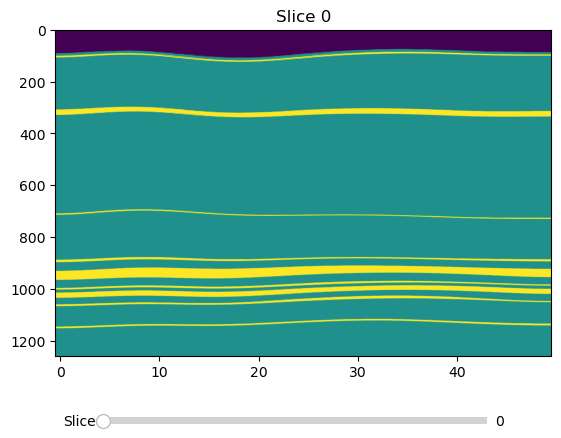

In [14]:
plot_3d_slices(geology.T)

<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\s'
<string>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\{'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\artemiy\AppData\Local\Temp\ipykernel_21096\3420462578.py:2: SyntaxWarning: invalid escape sequence '\{'
  temp = np.load(f"..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1\{non_zero[ind]}")
C:\Users\artemiy\AppData\Local\Temp\ipykernel_21096\3420462578.py:2: SyntaxWarning: invalid escape sequence '\s'
  temp = np.load(f"..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1\{non_zero[ind]}")


faulted_age_2025.76439254.npy


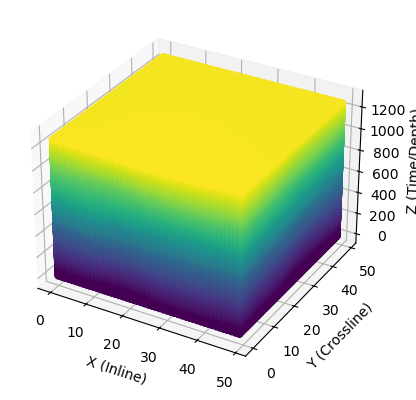

In [16]:
ind = 10
temp = np.load(f"..\scratch\synthoseis_example_test_mode_\seismic__2025.76439254_1\{non_zero[ind]}")
scatter3d_from_array(temp)
print(non_zero[ind])

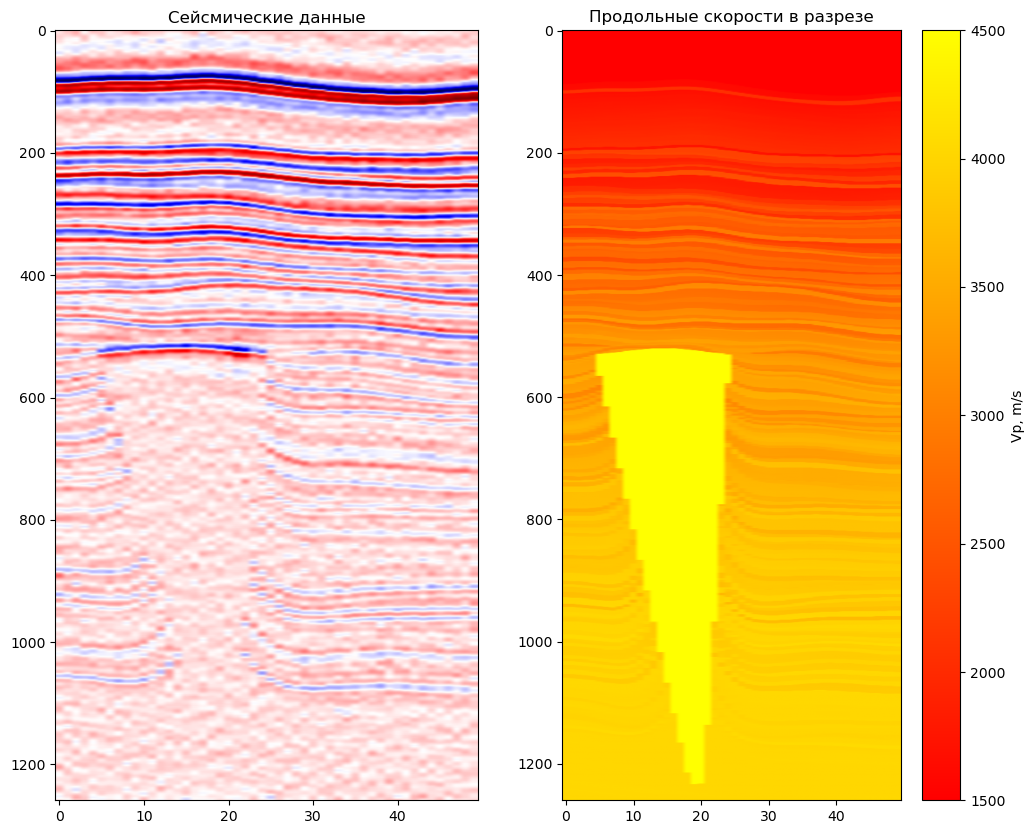

In [ ]:
fig, axs = plt.subplots(1,2, figsize=(12,10))
iline = 10

#test
# fig.suptitle(f'Iline: {iline}', fontsize = 15)
axs[0].imshow(seismic[iline,:,:].T, cmap=plt.cm.seismic, aspect='auto')
axs[0].set_title('Сейсмические данные')
# lith_cb = axs[1].imshow(geology[iline,:,:].T, cmap=plt.cm.turbo, aspect='auto')
vp_cb = axs[1].imshow(vp[iline,...].T, cmap=plt.cm.autumn, aspect='auto')
axs[1].set_title('Продольные скорости в разрезе')
fig.colorbar(vp_cb, ax=axs[1], label='Vp, m/s')
# fig.colorbar(lith_cb, ax=axs[1], label='lithology')
plt.show()